In [1]:
import pandas as pd
barevo = pd.read_csv('/content/Kaagle_Upload.csv')
print("shape of the dataset:", barevo.shape)
barevo.head()

shape of the dataset: (140530, 70)


<ipython-input-1-743446281649>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  barevo = pd.read_csv('/content/Kaagle_Upload.csv')


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data = barevo.loc[:,['vehicle_type', 'casualty_severity']]
data.head()

,vehicle_type,casualty_severity
0,9,NaN
1,9,NaN
2,9,3.0
3,20,3.0
4,9,NaN


In [8]:
import numpy as np

data = pd.DataFrame(data)
print(data)

data.dropna(subset=['casualty_severity'], inplace= True)
print("\n NEW DATA")
print(data)

        vehicle_type  casualty_severity
0                  9                NaN
1                  9                NaN
2                  9                3.0
3                 20                3.0
4                  9                NaN
...              ...                ...
140525            19                NaN
140526             9                3.0
140527             9                3.0
140528             9                NaN
140529             9                NaN

[140530 rows x 2 columns]

 NEW DATA
        vehicle_type  casualty_severity
2                  9                3.0
3                 20                3.0
5                  1                3.0
6                  3                3.0
8                  9                3.0
...              ...                ...
140521             9                2.0
140523             9                3.0
140524             9                3.0
140526             9                3.0
140527             9                3.0

[

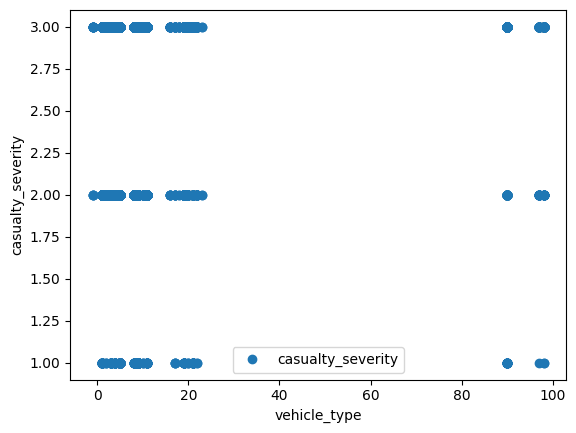

In [12]:
import matplotlib.pyplot as plt
data.plot(x='vehicle_type', y='casualty_severity' , style='o')
plt.xlabel('vehicle_type')
plt.ylabel('casualty_severity')
plt.show()

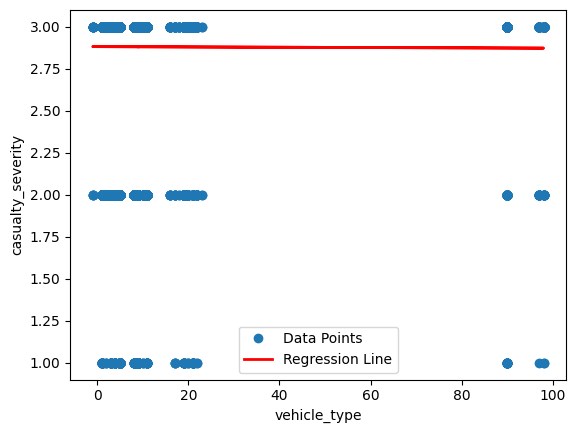

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data= pd.DataFrame(data)

X = data[['vehicle_type']]
y= data['casualty_severity']

regressor = LinearRegression()
regressor.fit(X, y)

data.plot(x='vehicle_type', y='casualty_severity', style='o', label='Data Points')
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('vehicle_type')
plt.ylabel('casualty_severity')
plt.legend()
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.DataFrame(data)
x= pd.DataFrame(data['vehicle_type'])
y= pd.DataFrame(data['casualty_severity'])

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73186, 1)
(18297, 1)
(73186, 1)
(18297, 1)


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)



[2.88257758]
[[-0.00022716]]


In [17]:
y_pred = regressor.predict(X_test)
y_pred


array([[2.88053314],
       [2.88235042],
       [2.88053314],
       ...,
       [2.88235042],
       [2.8818961 ],
       [2.88053314]])

In [18]:
y_test

,casualty_severity
34920,3.0
5740,3.0
128668,3.0
32997,3.0
44841,3.0
...,...
122569,3.0
112345,3.0
17094,3.0
94263,3.0


In [19]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

Mean absolute error: 0.2103497894852182
Mean squared error: 0.11833284415094497
Root mean squared error: 0.3439954129795119


In [20]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(x,y)
joblib.dump(model, 'accident_linear_regression_model.pk1')

['accident_linear_regression_model.pk1']

In [22]:
#testing my more datatset with the model
import joblib
import numpy as np
import pandas as pd

#creating my sample dataset
new_X = np.array([7,6,4,6,5,8,9,3,4,5,3,3,3,2,4,5,6]).reshape(-1,1)
model = joblib.load('/content/accident_linear_regression_model.pk1')
predictions = model.predict(new_X)

new_data = pd.DataFrame({'X': new_X.flatten(), 'Predicted_Y': predictions.flatten()})
print(new_data)

    X  Predicted_Y
0   7     2.881225
1   6     2.881316
2   4     2.881499
3   6     2.881316
4   5     2.881407
5   8     2.881133
6   9     2.881042
7   3     2.881590
8   4     2.881499
9   5     2.881407
10  3     2.881590
11  3     2.881590
12  3     2.881590
13  2     2.881682
14  4     2.881499
15  5     2.881407
16  6     2.881316


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
